#1. Librerias y datos

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yfin

#Manejo de tablas de datos
import pandas as pd

#Funciones numericas
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

#Datos
import pandas_datareader as pdr

In [ ]:
#Datos amazon
df=yfin.download('AMZN', start='2020-01-01', end='2021-01-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000


In [ ]:
#Datos desde la fred
datos= pdr.get_data_fred('DCOILBRENTEU', start= '2016-01-01', end='2021-01-01')
datos=datos.dropna()
datos.columns=['Close']
datos

#2. Media movil exponencial

In [ ]:
#Media movil exponencial 5 días
df['EMA_short']=df['Close'].ewm(span=5, adjust=False).mean()

#Media movil exponencial 20 días
df['EMA_long']=df['Close'].ewm(span=20, adjust=False).mean()
df

df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,94.900497,94.900497,0,NaN,NaN
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,94.516497,94.790783,0,NaN,NaN
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,94.725664,94.824423,0,NaN,NaN
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,94.931443,94.873811,1,95.343002,NaN
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,94.820463,94.847591,-1,NaN,94.598503
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,159.449286,158.882895,0,NaN,NaN
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,161.032190,159.389095,0,NaN,NaN
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,162.721462,160.028229,0,NaN,NaN


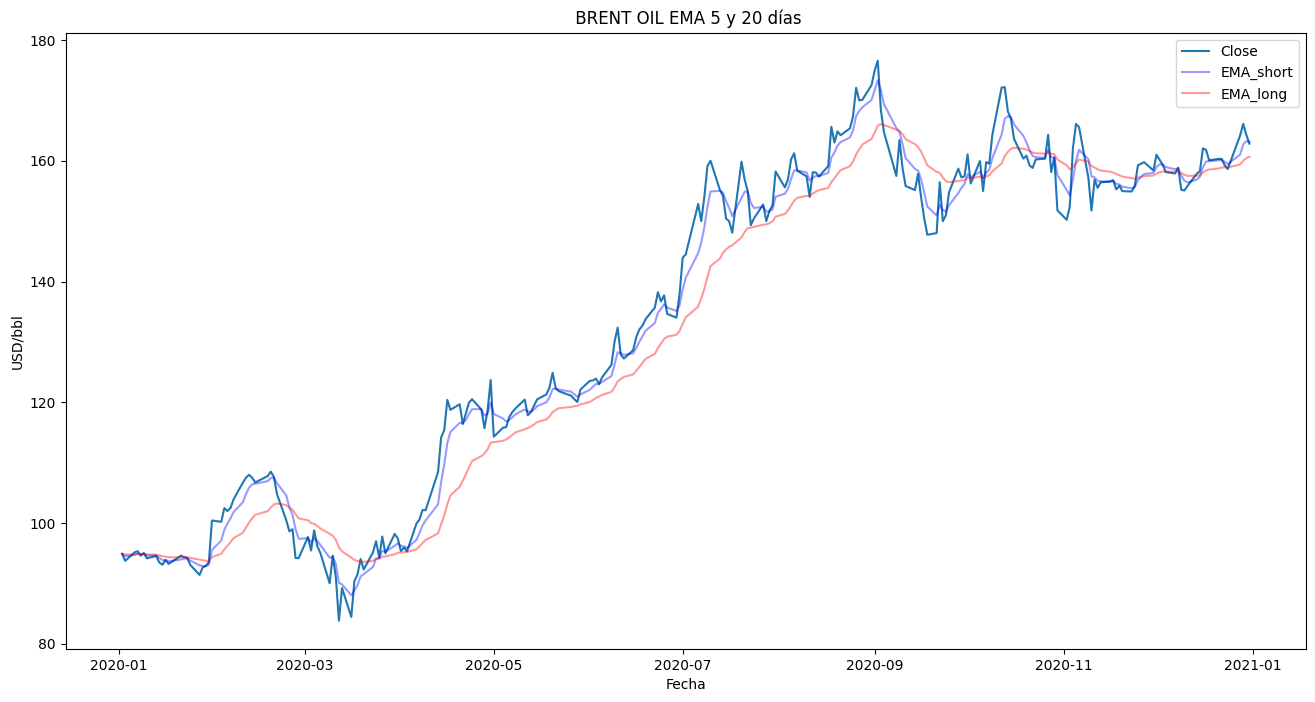

In [ ]:
#Gráfico
plt.figure(figsize=(16,8))
plt.title(' BRENT OIL EMA 5 y 20 días')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='blue', alpha=0.4)
plt.plot(df['EMA_long'], color='red', alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD/bbl')
plt.legend(['Close','EMA_short','EMA_long'])
plt.show()

#3. Automatización y gráfico

In [ ]:
#Número de datos
N=len(df)
N

#Lista de señales
#-1 vender
# 0 mantener
# 1 comprar
signals=[0]

for i in range(1, N):
  short=df['EMA_short'][i]
  long= df['EMA_long'][i]

  p_short=df['EMA_short'][i-1]
  p_long=df['EMA_long'][i-1]

  if p_short < p_long and short >= long:
    signals.append(1)

  elif p_short > p_long and short <= long:
    signals.append(-1)

  else:
    signals.append(0)

df['Signals']= signals
df


,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals
Date,,,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,94.900497,94.900497,0
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,94.516497,94.790783,0
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,94.725664,94.824423,0
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,94.931443,94.873811,1
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,94.820463,94.847591,-1
...,...,...,...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,159.449286,158.882895,0
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,161.032190,159.389095,0
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,162.721462,160.028229,0


In [ ]:
#Elementos gráficos
df['Buy']=np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell']=np.where(df['Signals']==-1, df['Close'], np.nan)
df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,94.900497,94.900497,0,NaN,NaN
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,94.516497,94.790783,0,NaN,NaN
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,94.725664,94.824423,0,NaN,NaN
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,94.931443,94.873811,1,95.343002,NaN
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,94.820463,94.847591,-1,NaN,94.598503
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,159.449286,158.882895,0,NaN,NaN
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,161.032190,159.389095,0,NaN,NaN
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,162.721462,160.028229,0,NaN,NaN


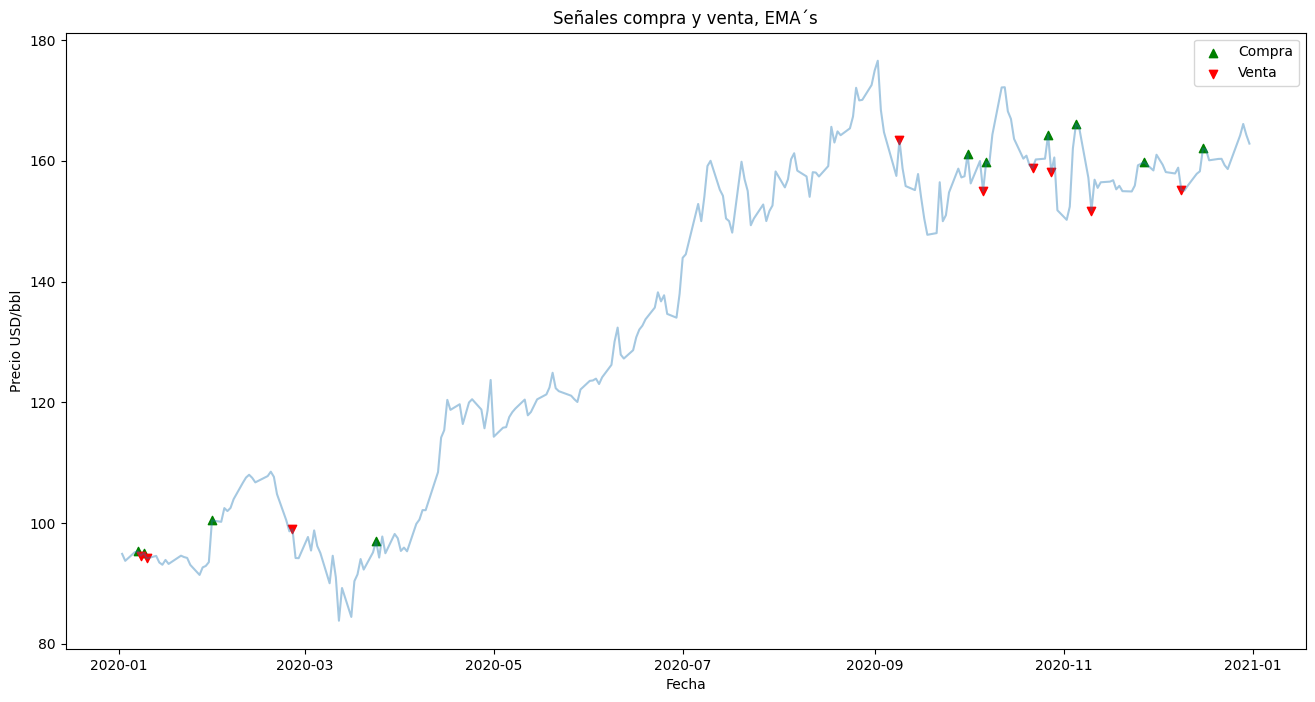

In [ ]:
#Gráfico
plt.figure(figsize=(16,8))
plt.plot(df['Close'], alpha= 0.4)
plt.scatter(df.index, df['Buy'], color='green', marker='^', label='Compra')
plt.scatter(df.index, df['Sell'], color='red', marker='v', label='Venta')
plt.title('Señales compra y venta, EMA´s')
plt.xlabel('Fecha')
plt.ylabel('Precio USD/bbl')
plt.legend()
plt.show()


#4. Backtesting

In [ ]:
equity=[100]

TP= 0.03 #Take profit
SL = 0.01 #Stop loss

#Posición inicial
pos = 0

In [ ]:


for i in range(1,N):

  equity.append(equity[i-1])
#Posición larga
  if pos==1:
    if df['Close'][i] >= price*(1+TP):
      pos=0
      equity[i]=equity[i]*(1+TP)

    elif df['Close'][i] <= price*(1-SL):
      pos=0
      equity[i]=equity[i]*(1-SL)

 #Posición corta
  elif pos==-1:
    if df['Close'][i] <= price*(1-TP):
      pos=0
      equity[i]=equity[i]*(1+TP)

    elif df['Close'][i] >= price*(1+SL):
      pos=0
      equity[i]=equity[i]*(1-SL)
#Sin posición
  else:

    if df['Signals'][i] !=0:
      pos = df['Signals'][i]
      price= df['Close'][i]


In [ ]:
#Creamos una columna con el capital diario
df['Equity']= equity
df

,Close,EMA_short,EMA_long,Signals,Buy,Sell,Equity
DATE,,,,,,,
2016-01-04,36.28,36.280000,36.280000,0,NaN,NaN,100.000000
2016-01-05,35.56,36.040000,36.211429,0,NaN,NaN,100.000000
2016-01-06,33.89,35.323333,35.990340,0,NaN,NaN,100.000000
2016-01-07,33.57,34.738889,35.759832,0,NaN,NaN,100.000000
2016-01-08,31.67,33.715926,35.370324,0,NaN,NaN,100.000000
...,...,...,...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0,NaN,NaN,122.044183
2020-12-28,50.88,50.821840,49.386208,0,NaN,NaN,122.044183
2020-12-29,50.44,50.694560,49.486569,0,NaN,NaN,122.044183


<function matplotlib.pyplot.show(close=None, block=None)>

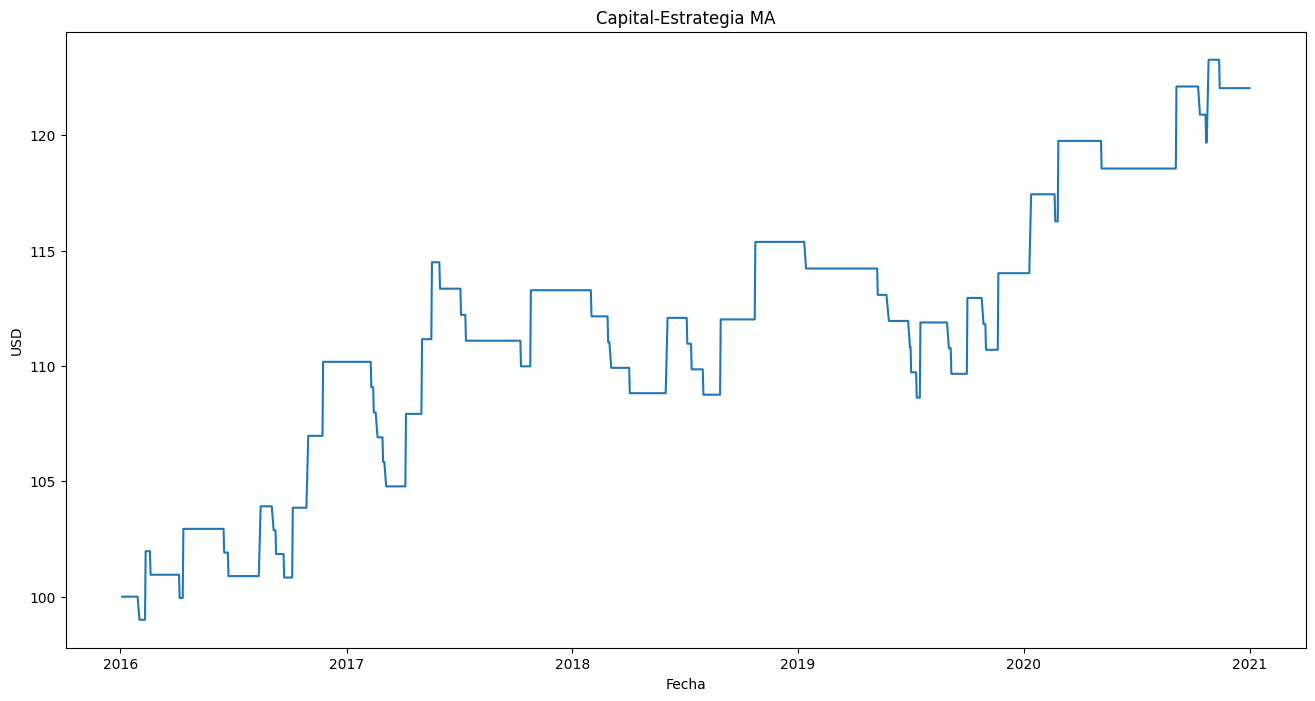

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Equity'])
plt.title('Capital-Estrategia MA')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.show

4. Desempeño

In [ ]:
#Retorno
ret= np.log(df['Equity']).diff().mean()
ret*=252
ret

0.03940475865712044

In [ ]:
#Volatilidad
vol=np.log(df['Equity']).diff().std()
vol*=np.sqrt(252)
vol

0.06506043984292004

In [ ]:
#tasa libre de riesgo
rf= 0.01

#Sharpe_ ratio
sharpe_ratio=(ret-rf)/vol
sharpe_ratio

0.4519606496376969

#Comparación


In [ ]:
#Comparación con portafolio de mercado

df2=yfin.download('^GSPC',start= '2016-01-01', end='2021-01-01')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000


In [ ]:
df2['Equity']=(100/df2['Close'][0])*df2['Close']
df2

,Open,High,Low,Close,Adj Close,Volume,Equity
Date,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,100.000000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,100.201223
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,98.887044
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,96.543377
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,95.497004
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,183.988354
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,185.593197
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000,185.179811


In [ ]:
#Retorno
ret= np.log(df2['Equity']).diff().mean()
ret*=252
print(ret)

#Volatilidad
vol=np.log(df2['Equity']).diff().std()
vol*=np.sqrt(252)
print(vol)

#tasa libre de riesgo
rf= 0.01

#Sharpe_ ratio
sharpe_ratio=(ret-rf)/vol
print(sharpe_ratio)


0.12498157725224736
0.19330789846069332
0.59481054922144


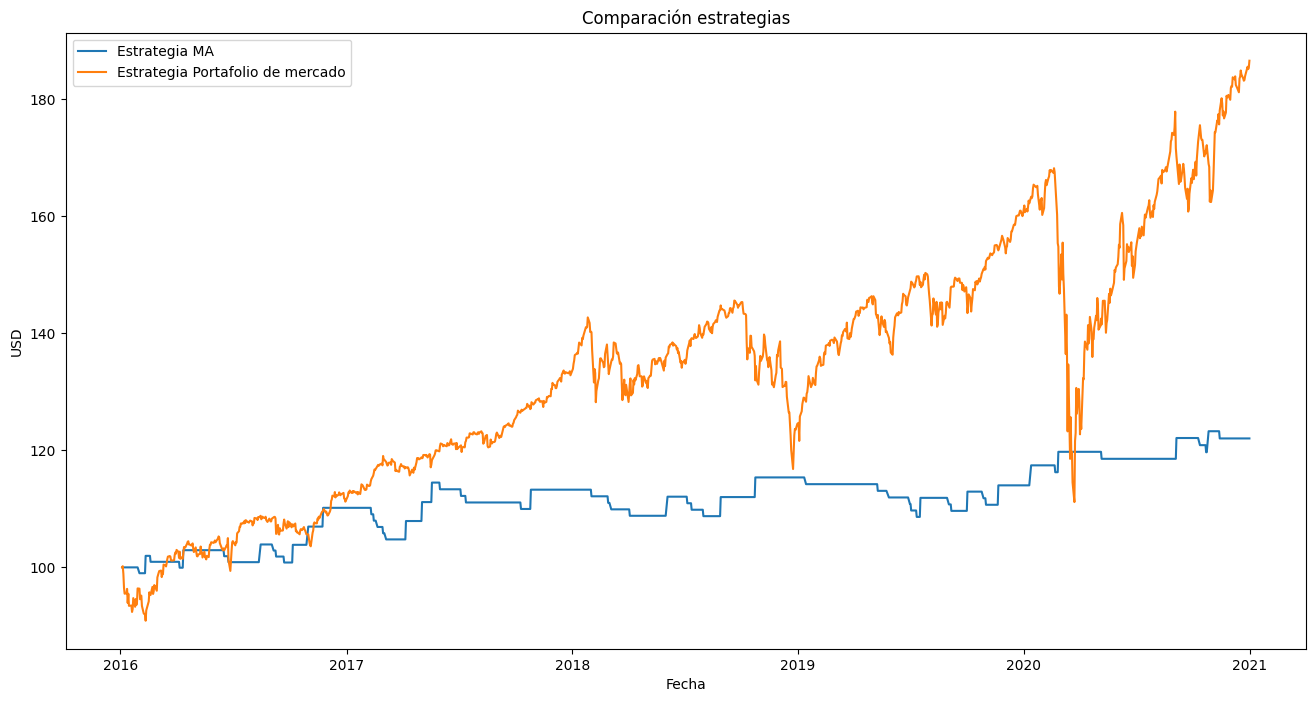

In [ ]:
#Comparación gráficos
plt.figure(figsize=(16,8))
plt.plot(df['Equity'], label='Estrategia MA')
plt.plot(df2['Equity'], label='Estrategia Portafolio de mercado')
plt.title('Comparación estrategias')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.legend()
plt.show()